<a href="https://colab.research.google.com/github/Nhinguyen0506/Training-Animal-pictures-DL/blob/main/Project_DL_Nhi_Nguyen_CECS456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset

In [ ]:
! pip install opendatasets
! pip install pandas

In [ ]:
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download")

ModuleNotFoundError: No module named 'opendatasets'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import sklearn
import numpy as np
import cv2 as cv
import os
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
IMG_SIZE=(28,28)
BATCH=32
dataset = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = tf.keras.preprocessing.image_dataset_from_directory(
        '/content/animals10/raw-img',validation_split=0.2,subset='training',
        seed=23,image_size=IMG_SIZE,batch_size=BATCH)

val_gen =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/animals10/raw-img',validation_split=0.2,subset="validation",
    seed=123,image_size=IMG_SIZE,batch_size=BATCH,
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


# Build a neural network model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding = "same", input_shape = [28, 28, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3
model.add(tf.keras.layers.Flatten()) #655
model.add(tf.keras.layers.Dense(units=350, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)  # Add dropout after the first dense layer
model.add(tf.keras.layers.Dense(units=150, activation="relu"))
tf.keras.layers.Dropout(0.5)   # Add dropout after the second dense layer
model.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

#compiling the model:


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# training neural network model:


In [ ]:
history = model.fit(train_gen,validation_data=val_gen,epochs=20)

Epoch 1/20
655/655 [==============================] - 313s 474ms/step - loss: 2.2637 - accuracy: 0.2487 - val_loss: 1.9067 - val_accuracy: 0.3190
Epoch 2/20
655/655 [==============================] - 299s 456ms/step - loss: 1.8711 - accuracy: 0.3487 - val_loss: 1.7747 - val_accuracy: 0.3765
Epoch 3/20
655/655 [==============================] - 300s 458ms/step - loss: 1.7265 - accuracy: 0.3958 - val_loss: 1.6570 - val_accuracy: 0.4264
Epoch 4/20
655/655 [==============================] - 297s 453ms/step - loss: 1.6400 - accuracy: 0.4300 - val_loss: 1.5303 - val_accuracy: 0.4714
Epoch 5/20
655/655 [==============================] - 296s 452ms/step - loss: 1.5268 - accuracy: 0.4682 - val_loss: 1.4628 - val_accuracy: 0.4951
Epoch 6/20
655/655 [==============================] - 300s 458ms/step - loss: 1.4204 - accuracy: 0.5069 - val_loss: 1.3598 - val_accuracy: 0.5286
Epoch 7/20
655/655 [==============================] - 297s 453ms/step - loss: 1.3142 - accuracy: 0.5468 - val_loss: 1.2842 -

In [ ]:
# Save the model
my_model = 'my_model_path.h5'
model.save(my_model)
print("Model saved successfully at:", my_model)
loaded_model = tf.keras.models.load_model(my_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: my_model_path.h5


#Evaluation



In [ ]:
# Evaluate the model on the validation set
score = model.evaluate(val_gen)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

164/164 [==============================] - 23s 138ms/step - loss: 1.0369 - accuracy: 0.7631
Total loss on Testing Set: 1.036920189857483
Accuracy of Testing Set: 0.7631327509880066


#Predicting the first three images from the test set


1.   print the predicted results of the test set
2.   print the real label of the first three images from the test set
3.   Plot the training and validation accuracy and loss


In [ ]:
proba = model.predict(val_gen)
proba.round(2)

164/164 [==============================] - 22s 132ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.01, 0.99, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.06, 0.19, 0.02, ..., 0.3 , 0.  , 0.  ],
       [0.01, 0.01, 0.  , ..., 0.  , 0.22, 0.76]], dtype=float32)

In [ ]:
pred = np.argmax( model.predict(val_gen), axis=-1)
pred

164/164 [==============================] - 22s 133ms/step


array([7, 5, 8, ..., 3, 5, 8])

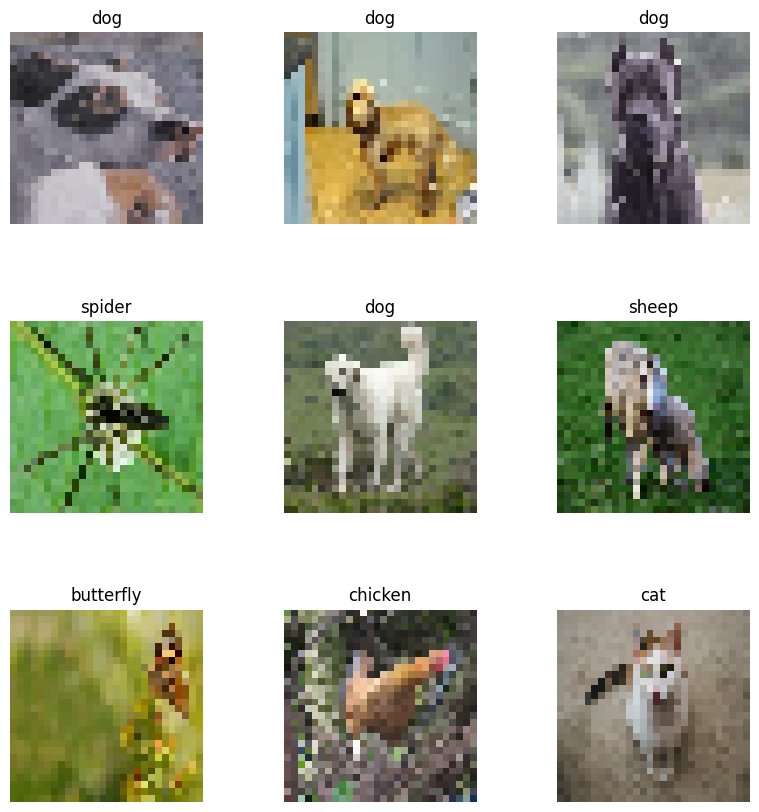

In [ ]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
classes=train_gen.class_names
plt.figure(figsize=(10,10), dpi=100)
for images,labels in train_gen.take(1):
    for n in  range(9):
        ax=plt.subplot(3,3,n+1)
        plt.imshow(images[n].numpy().astype('uint8'), cmap="binary", interpolation="nearest")
        translated_label = translate[classes[labels[n]]]
        plt.title(translated_label, fontsize=12)
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

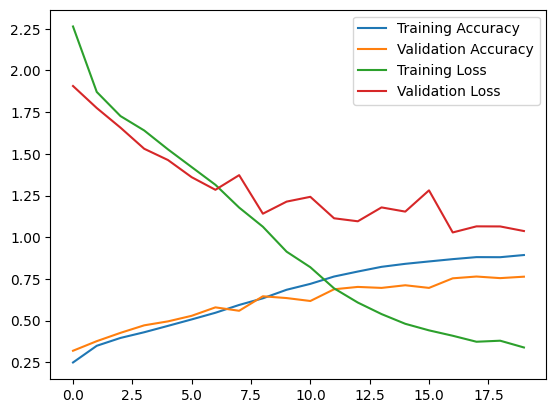

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()